# Preprocessing: 

In this notebook we will work on the following preprocessing tasks:

In [8]:
import sys
sys.path.insert(0, './utils')
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

## Missing Values and Outliers:
In the following cells we will look at a toy time series that misses values. Also the time series contains outliers or anomalies that doesn't seem to fit into the rest of values. We will look at different ways to deal with missing values aswell as detacting outliers inside our data.

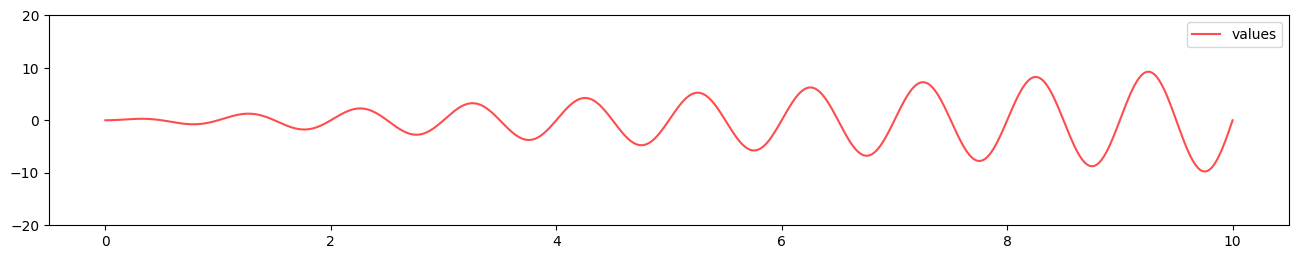

In [9]:
from utils.tdm_utils import create_sinusodial_data_samples

toy_ts = create_sinusodial_data_samples(n_samples=1000,len_ts= 10,f= 1, amp= 1)

The above function `create_sinusodial_data_samples(n_samples, len_ts, f ,amp)` creates a sinusodial graph with growing values. Feel free to play around with the input values to change the apperance of the graph. Next we cut out some values and add annomalies.

In [ ]:
def add_random_missing_values(x, n_missing = 10):
    missing_idx = np.random.choice(range(len(x)), n_missing)
    x_missing = x.copy()
    x_missing[missing_idx] = np.nan

    plt.figure(figsize=(16, 6))
    plt.subplot(212)
    plt.plot(x_missing, 'r', label='samples')
    plt.legend()
    plt.show()

    return x_missing

toy_ts_missing = add_random_missing_values(toy_ts, n_missing = 100)

In [ ]:
def add_random_anomalies(x, n_anomalies =10, scale=30):
    anomalies_idx = np.random.choice(range(len(x)), n_anomalies)
    x_anomalies = x.copy()
    x_anomalies[anomalies_idx] = x_anomalies[anomalies_idx] *scale

    plt.figure(figsize=(16, 6))
    plt.subplot(212)
    plt.plot(x_anomalies, 'r', label='samples')
    plt.legend()
    plt.show()

    return x_anomalies

toy_ts_missing_anomalies = add_random_anomalies(toy_ts_missing, n_anomalies = 20, scale=2.5)

## Why do we do that?
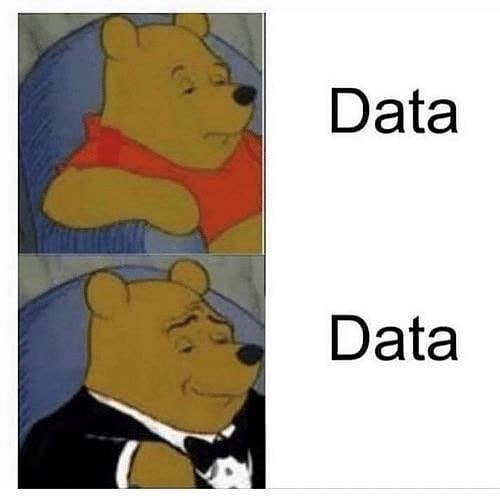

It seems weird that we artificialy add anomalies and missing values to our data. So why do we bother? Isn't it easier to work with intact data?
The answer is yes! But in reality we are most of the time facing "bad" or "dirty" data which needs to be cleaned up beforehand. Providers of data often have an idealistic view on the quality of their own data, but experience taught us that those views are often flawed. Most of the time the data arrives in an unhomogenous, with errors convoluted and wrongly formated state. Recreating those problems by artificaly adding noise, missing values and anomilies to our data is the bare minimum we can do to simulate real life.


### Task: Remove the outliers
There are different approaches of removing outliers from your data. Research through your search engine of choice and replace the outliers in `toy_ts_missing_anomalies` with NaNs.

In [ ]:

def replace_outliers_with_NaN(x,window=50):
    
    result = []
    
    # your code goes here
    
    #write code that cleanes up x by replacing the outliers with NaN
    #hint: you can filter them section vise using the window parameter
    
    #your code goes here
    

    plt.figure(figsize=(16, 6))
    plt.subplot(212)
    plt.plot(result, 'r', label='samples')
    plt.legend()
    plt.show()

    return result


toy_ts_missing_anomalies_clean = replace_outliers_with_NaN(toy_ts_missing_anomalies)

In [ ]:
# Convert the numpy array to a pandas DataFrame
df_toy_ts = pd.DataFrame(toy_ts_missing_anomalies_clean)

# Interpolate the missing values
# Hint: You can use the pandas interpolate method
df_toy_ts_interpolated = 

# Plot the interpolated time series
plt.figure(figsize=(16, 6))
plt.subplot(212)
plt.plot(df_toy_ts_interpolated, 'r', label='Interpolated samples')
plt.plot(toy_ts_missing_anomalies, 'b--', label='Original samples', alpha=0.5)
plt.show()

As you can see it is quite hard to get rid of all anomalies. In the lecture we learned about different other approaches that can be used to find anomalies 

## PCA:
In this section we will look at some complex data and learn about PCA and how it is used. Below you find and introducing description of what a PCA is.
```
Principal Component Analysis (PCA) is a statistical technique used to reduce the dimensionality of data while preserving as much variance as possible. It transforms the original variables into a new set of uncorrelated variables called principal components, which are ordered by the amount of variance they capture. This allows for easier visualization and analysis of complex datasets, often revealing patterns and relationships that were not obvious in the original data. PCA is commonly used in machine learning for preprocessing data, noise reduction, and feature extraction. Overall, it helps simplify data without losing significant information.
```


As an example we will look at the `activity_u1` dataset:

In [ ]:
import pandas as pd
import numpy as np

path_raw = './activity_u1/u1_s1_rechts.csv'
Xraw = pd.read_csv(path_raw, header=1)


Look at the following function `preprocess_raw(Xraw)` and try to understand what it does

In [ ]:
def preprocess_raw(Xraw):
    """ Takes a pandas data frame with raw activity data,
    replaces its labels with numerical values and returns an ndarray 
    without a timestamp.
    
    Parameters:
    ===========
    Xraw - raw data frame
    
    Returns:
    ========
    X,y : ndarray with shape (n,3) [X, Y, Z] and labels
    """
    y = Xraw['Label'].astype('category').cat.codes.values
    X = Xraw[['X','Y','Z']].values
    return X,y

Now use the function to read in the dataset and plot it

In [ ]:
#use the function
X, y = 


labels = ['X', 'Y', 'Z']
ts = np.arange(len(X))

plt.figure(figsize=(16, 9))
[ plt.plot(ts, X[:,d], label=labels[d], alpha=0.75) for d in np.arange(3)]
plt.legend()
plt.show()


 Read all sensor data and plot each dimension (there are 3 dimensions: x,y,z).

**Note:** Ignore the labels, create one plot for each dimensions containing all sensors.

In [ ]:
Xsraw = [ pd.read_csv("./activity_u1/u1_s{}_rechts.csv".format(i), header=1) for i in range(1,6)]
Xs = [ preprocess_raw(Xr)[0] for Xr in Xsraw ]

In [ ]:
#write the plot_dimensions function
def plot_dimensions(d, Xs):
    # your code goes here
    #write code that plots the d-th dimension of each array in Xs
    
    #your code goes here

plt.figure(figsize=(10,8))
plot_dimensions(3, Xs)        
plt.show()


Now that we had a look at the data we want to import [PCA](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html) from sklearn and perform a 2 component calculation

In [ ]:
from sklearn.decomposition import PCA

#use the PCA class to fit and transform the data for 2 components

## Normalization and Standardization:
In this section we will learn about Normalization and Standardization. We will look at some raw data and then preprocess it. Again we provide some intuitive explination below:
```
Normalization and standardization are techniques used to preprocess data for machine learning. Normalization rescales the data to a range between 0 and 1, making it easier to compare different features, while standardization transforms the data to have a mean of 0 and a standard deviation of 1, ensuring that each feature contributes equally to the analysis. Both methods help improve the performance of machine learning algorithms by ensuring that features are on a similar scale. As well as preventing problems during neural network training [more infos in the future]
```


In [1]:
from utils.tdm_utils import generate_points_in_2D

# Example usage
n = 1000
points = generate_points_in_2D(n)

# Plot the scaled points
plt.figure(figsize=(8, 6))
plt.scatter(points[:, 0], points[:, 1], alpha=0.6)
plt.xlabel('X')
plt.ylabel('Y')
plt.grid(True)
plt.show()


ModuleNotFoundError: No module named 'tdm_utils'

Normalize the generated points and plot it

Standardize the generated points and plot it

Use MinMaxScaler and StandardScaler from the sklearn.preprocessing tool set

In [ ]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

# Normalize the points


# Standardize the points


# Plot the standardized points
plt.figure(figsize=(8, 6))
plt.scatter(points[:, 0], points[:, 1], alpha=0.3, label='Original')
plt.scatter(normalized_points[:, 0], normalized_points[:, 1], alpha=0.3, label='Normalized')
plt.scatter(standardized_points[:, 0], standardized_points[:, 1], alpha=0.1, label='Standardized')
plt.xlabel('X')
plt.ylabel('Y')
plt.xlim(-2,20)
plt.ylim(-2,20)
plt.legend()
plt.grid(True)
plt.show()


## Discretization and Quantization

First we read in the content of `u1_s1_rechts.csv` and apply the `preprocess_raw` function as before.

In [ ]:
path_dis_quant = './activity_u1/u1_s1_rechts.csv'
df_dis_quant = pd.read_csv(path_dis_quant, header=1)
X,y = preprocess_raw(df_dis_quant)

Next we want to reduce the size of the data by a factor of 100 by using the mean. Afterwards plot the original and reduced data to compare it.

In [ ]:
# your code goes here


In [ ]:
# plot it

In the next step we want to quantize the signal with 16 levels. Make use of functions 
[np.histogram](https://docs.scipy.org/doc/numpy/reference/generated/numpy.histogram.html) and [np.digitize](https://numpy.org/doc/stable/reference/generated/numpy.digitize.html).

In [ ]:
def quantize(X,steps=16):
    # your code goes here
    

Xq = quantize(disc[:,0])

plt.figure(figsize=(16, 9))
plt.plot(np.arange(len(disc))*scale, disc[:,0], 'r', label='mean', alpha=0.3)
plt.plot(np.arange(len(Xq))*scale, Xq, 'g', label='quantized', alpha=0.5)
plt.grid(True)
plt.legend()
plt.show()

Now we can look at the quantized data and scatter it in 2D space. We can also color the points by the quantized value.

In [ ]:
X_q_all = np.array([quantize(disc[:,d]) for d in range(3)]).T
plt.figure(figsize=(16, 9))
plt.scatter(np.arange(len(X_q_all)), X_q_all[:,0], alpha=0.5,c=disc_y,s=150)
plt.grid(True)
plt.show()
